# A Formula for Success: Predicting How to Win in Baseball
### Notebook 2

In our previous notebook, we pulled, cleaned, and explored the data. In this notebook, we will explore, train, test, and refine models so that we can determine the formula for winning in baseball.

To begin, we will import the needed tools and the dataframe.

In [14]:
# import needed tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Pull dataframe
df = pd.read_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Combined_Cleaned.csv')
df.head()

,TeamYear,Season,Team,W%,HR,BB%,ISO,BABIP_x,AVG,OBP,SLG,wOBA,BIZ,Plays,RZR,HR/9,BABIP_y,GB%,HR/FB
0,2019_Astros,2019,Astros,0.660494,1.777778,0.101,0.221,0.296,0.274,0.352,0.495,0.355,10.864198,8.839506,0.814,1.42,0.270,0.436,0.167
1,2016_Cubs,2016,Cubs,0.635802,1.228395,0.104,0.173,0.302,0.256,0.343,0.429,0.333,12.018519,10.253086,0.853,1.01,0.255,0.469,0.131
2,2011_Yankees,2011,Yankees,0.598765,1.370370,0.099,0.181,0.292,0.263,0.343,0.444,0.345,13.635802,11.320988,0.830,0.94,0.297,0.442,0.099
3,2015_Blue Jays,2015,Blue Jays,0.574074,1.432099,0.091,0.188,0.298,0.269,0.340,0.457,0.344,13.802469,11.462963,0.831,1.08,0.278,0.437,0.110
4,2011_Red Sox,2011,Red Sox,0.555556,1.253086,0.090,0.181,0.314,0.280,0.349,0.461,0.352,13.388889,11.296296,0.844,0.96,0.285,0.423,0.091


In our last notebook, we used RFE to find the 15 most significant columns in determining winning percentage. We will view the correlation heatmap and correlation matrix values again as a summary.

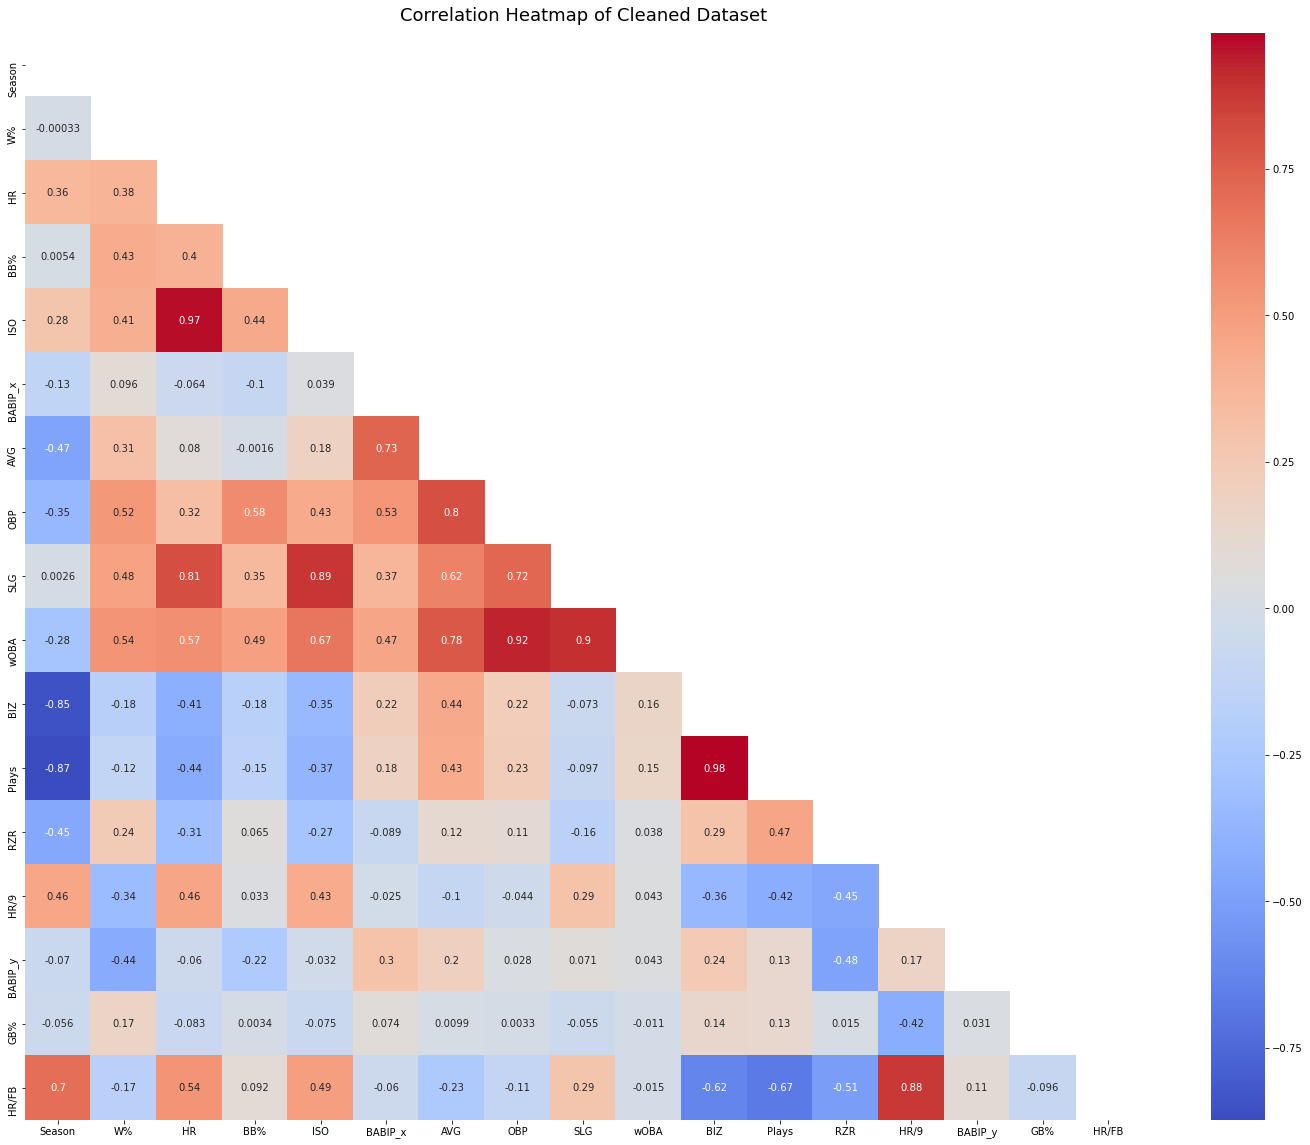

In [15]:
# Create object for graph
win_cor = df.corr()

# Remove half of heatmap
mask = np.zeros(win_cor.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True

# Graph correlation heatmap
plt.subplots(figsize = (25,20))
cor_heatmap = sns.heatmap(win_cor, xticklabels = win_cor.columns, yticklabels = win_cor.columns, annot = True, annot_kws={'size': 10}, cmap = 'coolwarm', mask = mask)
cor_heatmap.set_title('Correlation Heatmap of Cleaned Dataset', fontdict={'fontsize':18}, pad=12)
plt.savefig('Heatmap2.png', bbox_inches = 'tight')

In [16]:
# Check correlations with win percentage
cor_matrix = df.corr()
print(cor_matrix['W%'].sort_values(ascending = False))

W%         1.000000
wOBA       0.542218
OBP        0.519069
SLG        0.479478
BB%        0.430403
ISO        0.414292
HR         0.383621
AVG        0.314798
RZR        0.236674
GB%        0.165925
BABIP_x    0.095652
Season    -0.000334
Plays     -0.119267
HR/FB     -0.165902
BIZ       -0.178398
HR/9      -0.336790
BABIP_y   -0.435198
Name: W%, dtype: float64


## VI. Data Modeling
Now that we have determined which features are best suited to building an effective linear regression model, we need to determine which type of model works best. To determine a which type of data model would best fit our data, we should explore both linear and multiple linear regression models.

### Linear Regression
To begin, we will explore a simple linear regression model. Put simply, this model is summed up in the following equation, where X is our predictor variable and Y is the response or dependent variable:$$
Y = \beta_{0} + \beta_{1}X + \epsilon
$$

We see that one feature that is most strongly correlated to win percentage is weighted on base average (wOBA). Our RFE process also includes it as a significant feature. As such, we will focus our linear regression model on that. Essentially, we want to view how wOBA can help us predict a team's win percentage. This model will use "wOBA" as the predictor/independent variable and "W%" as the response/dependent variable.

In [17]:
# Let's create a linear regression object
lr = LinearRegression()

# Set variables
X = df[['wOBA']]
Y = df['W%']

# Fit the model
lr.fit(X,Y)

# Check intercept and slope
lr.intercept_, lr.coef_

(-0.34397881712886275, array([2.63737356]))

We've been given our values of the intercept (beta 0) and slope (beta 1).$$
Y = \beta_{0} + \beta_{1}X + \epsilon
$$

So the final estimated linear regression model is:

<div align="center"><i><b>W%</b> = -0.344 + 2.637(wOBA)</i></div>

Let's look at this visually through a regression plot, and then view the variance through a residual plot.

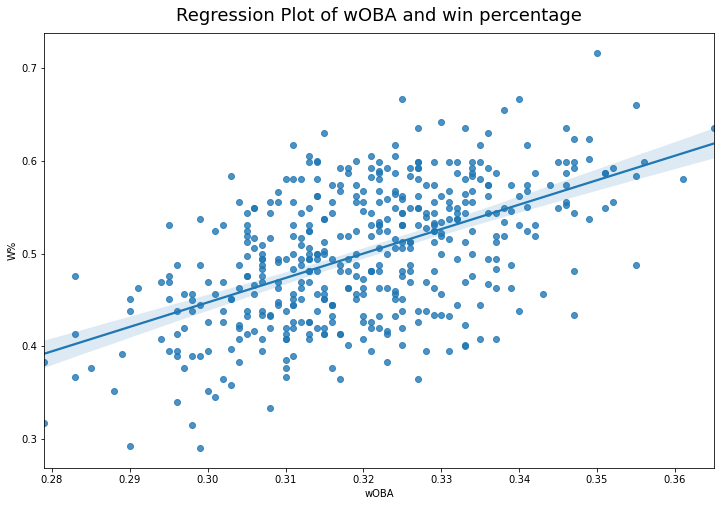

In [18]:
# Regression plot
plt.figure(figsize=(12,8))
regplot1 = sns.regplot(x = df['wOBA'], y = df['W%'], data = df)
regplot1.set_title('Regression Plot of wOBA and win percentage', fontdict={'fontsize':18}, pad=12)
plt.savefig('SLR_RegPlot.png', bbox_inches = 'tight')

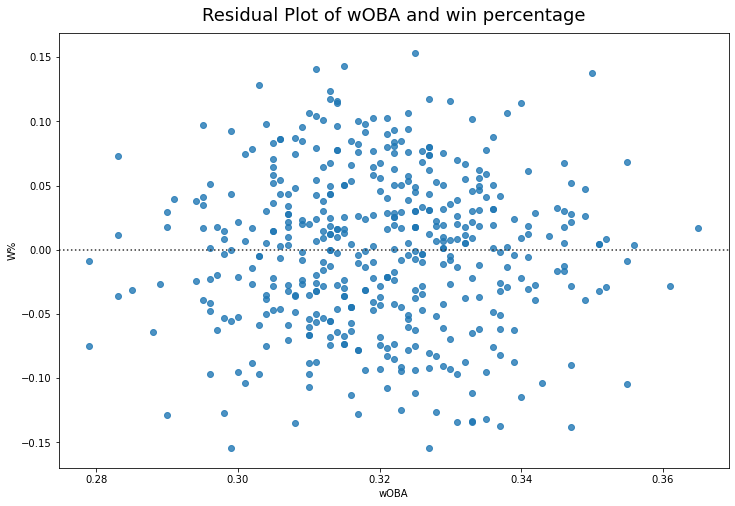

In [19]:
# Residual Plot
plt.figure(figsize=(12, 8))
resplot1 = sns.residplot(df['wOBA'], df['W%'], data = df)
resplot1.set_title('Residual Plot of wOBA and win percentage', fontdict={'fontsize':18}, pad=12)
plt.savefig('SLR_ResPlot.png', bbox_inches = 'tight')

What we see from above is that win percentage is positively correlated to weighted on base average, which we knew from the correlation heatmap. But we also see some variance, as not all the dots are close to the line. When we view this through the residual plot, we see that there is some randomness in the spread of residuals, which is good. As such, we should evaluate the accuracy of this model by calculating the R-Squared and Mean Squared Error values.

In [20]:
# Fit the model
lr.fit(X, Y)

# Print R-squared
print('The R-squared is:', lr.score(X, Y))

# Calculate and print MSE
Yhat = lr.predict(X)
MSE = mean_squared_error(Y, Yhat)
print('The mean squared error of actual W% and predicted W% is:', MSE)

The R-squared is: 0.2940004271229022
The mean squared error of actual W% and predicted W% is: 0.0036823132736963408


In [21]:
# Let's check this model with statsmodel
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           9.37e-36
Time:                        21:47:26   Log-Likelihood:                 622.43
No. Observations:                 450   AIC:                            -1241.
Df Residuals:                     448   BIC:                            -1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3440      0.062     -5.561      0.0

We can say that approximately 29.4% of the variation of win percentage is explained by this linear model with 'wOBA'.

Now we will try a Multiple Linear Regression model, and evaluate it to compare which model will better meet our goals.

#### Multiple Linear Regression

We can try to predict win percentage by using more than one variable. We will take five features from our RFE list: 'wOBA', 'OBP', 'SLG', 'BB%', and 'BABIP_y'. The equation for this multiple linear regression is:

$$
Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2}X_{2} + \cdots \beta_{p}X_{p} + \epsilon
$$

We will develop a model based on those five predictor variables.

In [22]:
# Create object for predictor variables
Z = df[['wOBA', 'OBP', 'SLG', 'BB%', 'BABIP_y']]

# Restating response variable
Y = df['W%']

# Fit the model
lr.fit(Z, Y)

# Check intercept and slopes
lr.intercept_, lr.coef_

(0.4791040239816229,
 array([ 1.41539577,  0.65152783,  0.35808903,  0.49618659, -2.82097402]))

Now let's return to the equation and determine our values of the intercept (a) and the slopes (b).

Our estimated multiple linear regression model is:

<div align="center"><i><b>W%</b> = 0.479 + 1.415(wOBA) + 0.652(OBP) + 0.358(SLG) + 0.496(BB%) - 2.821(BABIP_y)</i></div>

Let's look at this visually, by comparing modeled values to actual values.

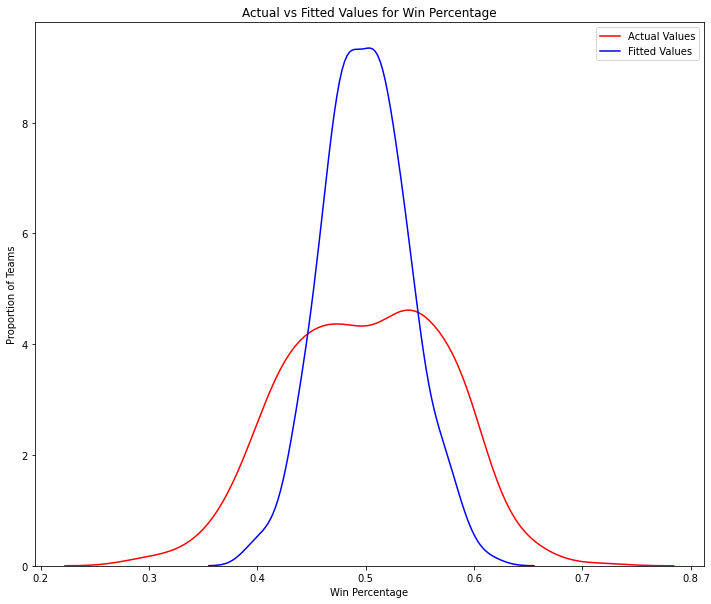

In [23]:
# Create a function for graphing distribution plots
def DistributionPlot(RedPlot, BluePlot, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    ax1 = sns.distplot(RedPlot, hist = False, color = 'r', label = RedName)
    ax2 = sns.distplot(BluePlot, hist = False, color = 'b', label = BlueName, ax = ax1)
    plt.title(Title)
    plt.xlabel('Win Percentage')
    plt.ylabel('Proportion of Teams')

    plt.show()
    plt.close()

# Graph distribution plot for this multiple linear regression
Title = 'Actual vs Fitted Values for Win Percentage'
DistributionPlot(Y, Yhat, 'Actual Values', 'Fitted Values', Title)

Overall, the fitted values are more spread out than the actual values, so there is room to improve this model, as we see a difference in the structures of both lines. We should now find this model's R-squared and Mean Squared Error values.

In [24]:
# Fit the model
lr.fit(Z, Y)

# Print R-squared
print('The R-squared is:', lr.score(Z, Y))

# Calculate and print MSE
Yhat = lr.predict(Z)
MSE = mean_squared_error(Y, Yhat)
print('The mean squared error of actual W% and predicted W% is:', MSE)

The R-squared is: 0.510789534394585
The mean squared error of actual W% and predicted W% is: 0.00255159671526258


In [25]:
# Let's check this model with statsmodel
Z = sm.add_constant(Z)
model = sm.OLS(Y, Z).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     92.72
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.08e-66
Time:                        21:47:27   Log-Likelihood:                 704.96
No. Observations:                 450   AIC:                            -1398.
Df Residuals:                     444   BIC:                            -1373.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4791      0.084      5.693      0.0

#### We can now compare the simple linear regression and multiple linear regression models.

Simple Linear Regression: using 'wOBA' as a predictor of 'W%'.
* R-squared: 0.2940004271229022
* MSE: 0.0036823132736963408
    
Multiple Linear Regression: using 'wOBA', 'OBP', 'SLG', 'BB%', and 'BABIP_y' as predictors of 'W%'.
* R-squared: 0.510789534394585
* MSE: 0.00255159671526258
    
We see that the R-squared value for the Multiple Linear Regression model is larger than that of the Simple Linear Regression model. Moreover, we also see that the MSE for the Multiple Linear Regression model is smaller than that of the Simple Linear Regression Model. Both of these metrics indicate that the Multiple Linear Regression model is a better model for us to use. Now we should further train, test, and refine the model.

## VII. Model Refinement

It's clear that a multiple linear regression model is more effective, but we still only reached an R-Square value of 0.511, meaning that approximately 51.1% of the variation of win percentage is explained by this our model. We will need to improve this model if it is to be relied on by a general manager of a team.

To begin, we will need to separate our data into training and test sets. We will use the 2017-2020 seasons as our test set.

#### Model Attempt 1

In [26]:
# Create dataset for Y
y_data = df['W%']

# Create dataset for X by removing W%
x_data = df.drop(['W%'], axis = 1)

In [27]:
# Separate data into train and test groups using last 20% of samples (2017-2020 seasons) in test group
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.266, shuffle = False)

# Report number of samples in each group
print('The number of training samples is:', x_train.shape[0])
print('The number of test samples is:', x_test.shape[0])

The number of training samples is: 330
The number of test samples is: 120


Now that we have set our training and test groups, we can apply them to our Multiple Linear Regression model.

In [28]:
# Create object for list of features
MLR1 = ['HR', 'BB%', 'ISO', 'BABIP_x', 'AVG', 'OBP', 'SLG', 'wOBA', 'BIZ',
       'Plays', 'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR1], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR1])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR1])

Now let's graph the distribution of the predicted values versus actual values in both the training and test groups.

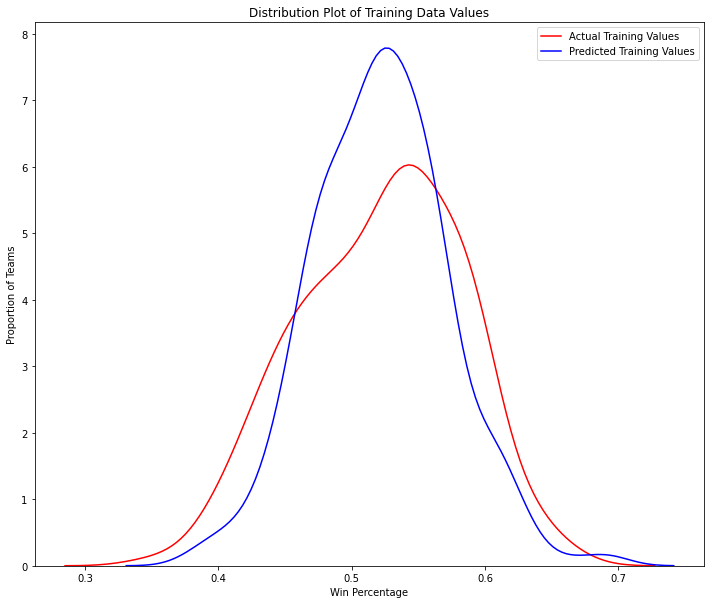

In [29]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

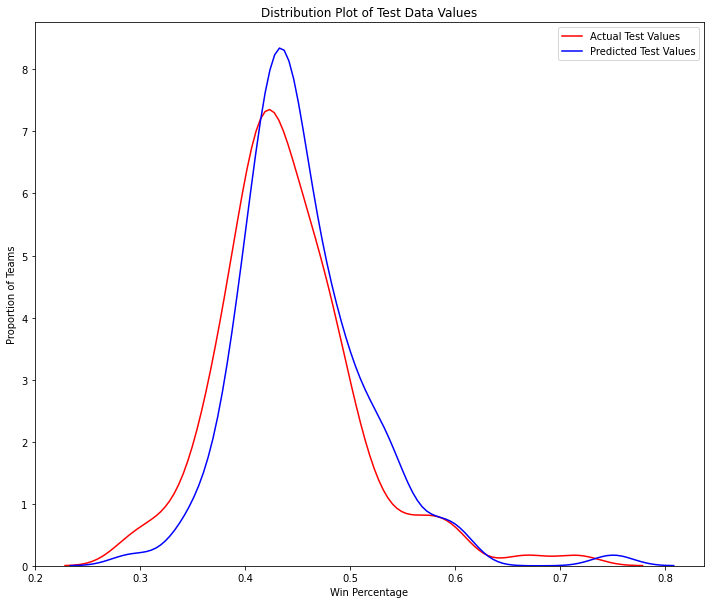

In [30]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [31]:
# Let's check the training model with statsmodel
X = x_train[MLR1]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     43.87
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           8.47e-68
Time:                        21:47:29   Log-Likelihood:                 642.45
No. Observations:                 330   AIC:                            -1253.
Df Residuals:                     314   BIC:                            -1192.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1021      1.440      1.460      0.1

In [32]:
# Let's check the test group with statsmodel
X = x_test[MLR1]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     13.04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.01e-17
Time:                        21:47:29   Log-Likelihood:                 217.09
No. Observations:                 120   AIC:                            -402.2
Df Residuals:                     104   BIC:                            -357.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9116      2.006     -0.454      0.6

In [33]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.540386914599615


From this model, we wind up with an R-squared value in the training group of 0.677, meaning 67.7% of the variance in the training data can be explained by the model. The test group's R-squared score was similar at 0.653. Having the R-squared scores of these two sets close to each other is indicative of success, but we should still refine this further. Our overall R-sqared score for this model is 0.540. Graphically, the distribution plot for the predicted test data values looks similar to the actual test data values; the peak of the curve of the predicted values is slightly higher, while the actual test values' curve peaks slightly sooner (at a lower win percentage). 

We should see if we can lower the cost of this model by decreasing the features included while also hopefully improving the R-squared score.

From the training group data, we see that the P-value of 'BB%' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 2

In [34]:
# Create object for list of features
MLR2 = ['HR', 'ISO', 'BABIP_x', 'AVG', 'OBP', 'SLG', 'wOBA', 'BIZ',
       'Plays', 'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR2], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR2])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR2])

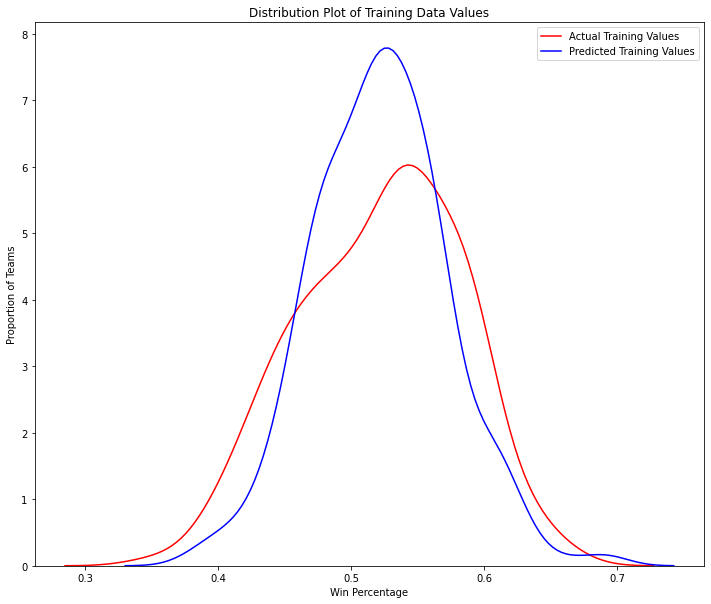

In [35]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

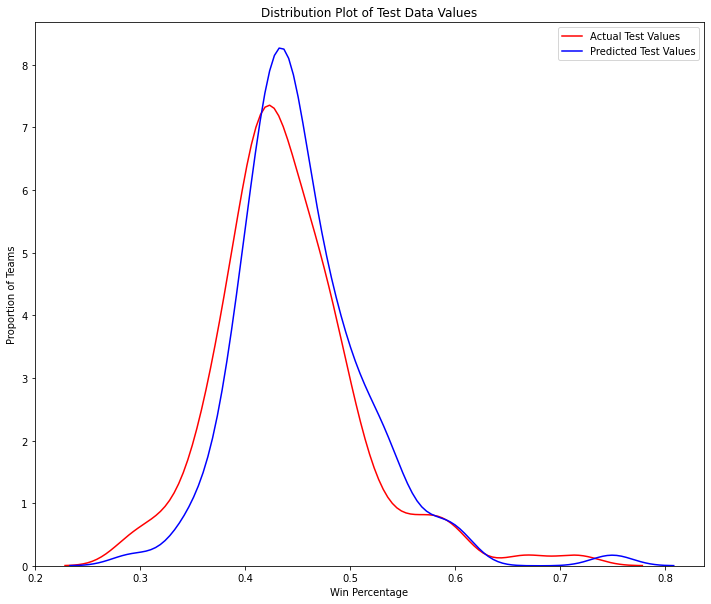

In [36]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [37]:
# Let's check the training group with statsmodel
X = x_train[MLR2]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     47.13
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.27e-68
Time:                        21:47:30   Log-Likelihood:                 642.40
No. Observations:                 330   AIC:                            -1255.
Df Residuals:                     315   BIC:                            -1198.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0893      1.438      1.453      0.1

In [38]:
# Let's check the test group with statsmodel
X = x_test[MLR2]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     14.11
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.63e-18
Time:                        21:47:30   Log-Likelihood:                 217.09
No. Observations:                 120   AIC:                            -404.2
Df Residuals:                     105   BIC:                            -362.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9084      1.994     -0.456      0.6

In [39]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5411966054056595


From this model, we wind up with an R-squared value in the training group of 0.677, meaning 67.7% of the variance in the training data can be explained by the model. The test group's R-squared score remained the same at 0.653. Our overall R-sqared score for this model is 0.541. Graphically, the distribution plot for the predicted test data values looks very similar to Model Attempt 1. 

From the training group data, we see that the P-value of 'SLG' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 3

In [40]:
# Create object for list of features
MLR3 = ['HR', 'ISO', 'BABIP_x', 'AVG', 'OBP', 'wOBA', 'BIZ',
       'Plays', 'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR3], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR3])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR3])

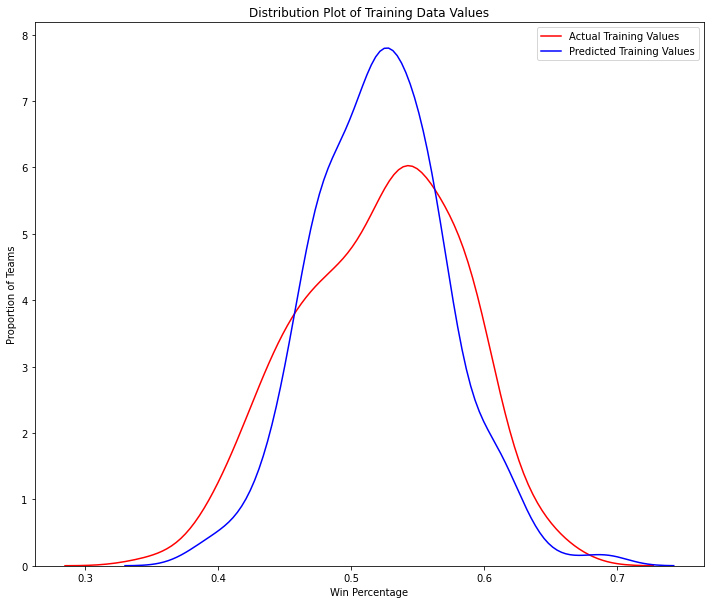

In [41]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

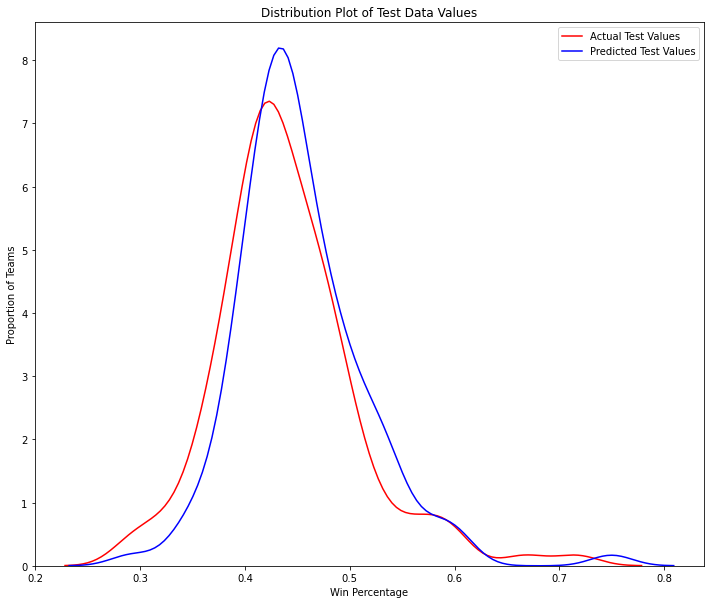

In [42]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [43]:
# Let's check the training group with statsmodel
X = x_train[MLR3]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     50.88
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.88e-69
Time:                        21:47:32   Log-Likelihood:                 642.31
No. Observations:                 330   AIC:                            -1257.
Df Residuals:                     316   BIC:                            -1203.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0576      1.433      1.435      0.1

In [44]:
# Let's check the test group with statsmodel
X = x_test[MLR3]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     15.32
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           6.78e-19
Time:                        21:47:32   Log-Likelihood:                 217.04
No. Observations:                 120   AIC:                            -406.1
Df Residuals:                     106   BIC:                            -367.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9602      1.977     -0.486      0.6

In [45]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5423934605348932


From this model, we wind up (again) with an R-squared value in the training group of 0.677, meaning 67.7% of the variance in the training data can be explained by the model. The test group's R-squared score fell slightly to 0.653. Our overall R-sqared score for this model is 0.542. Graphically, the distribution plot for the predicted test data values looks similar to previous modeling. 

From the training group data, we see that the P-value of 'ISO' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 4

In [46]:
# Create object for list of features
MLR4 = ['HR', 'BABIP_x', 'AVG', 'OBP', 'wOBA', 'BIZ',
       'Plays', 'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR4], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR4])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR4])

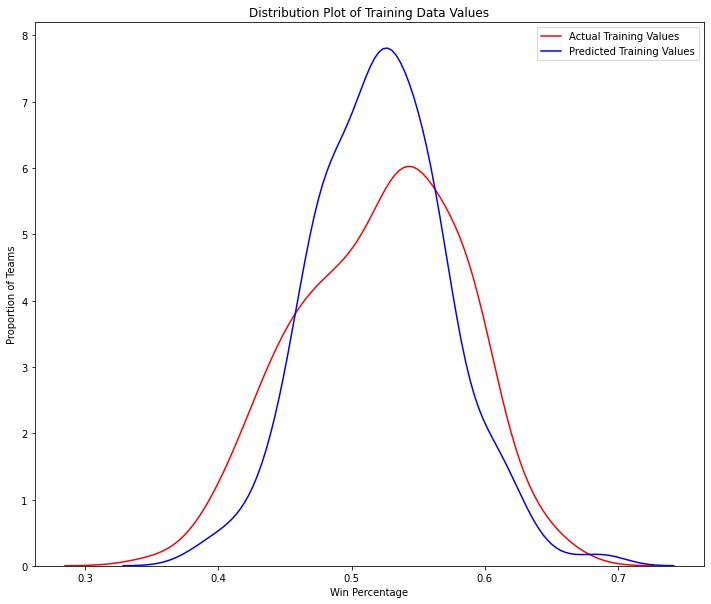

In [47]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

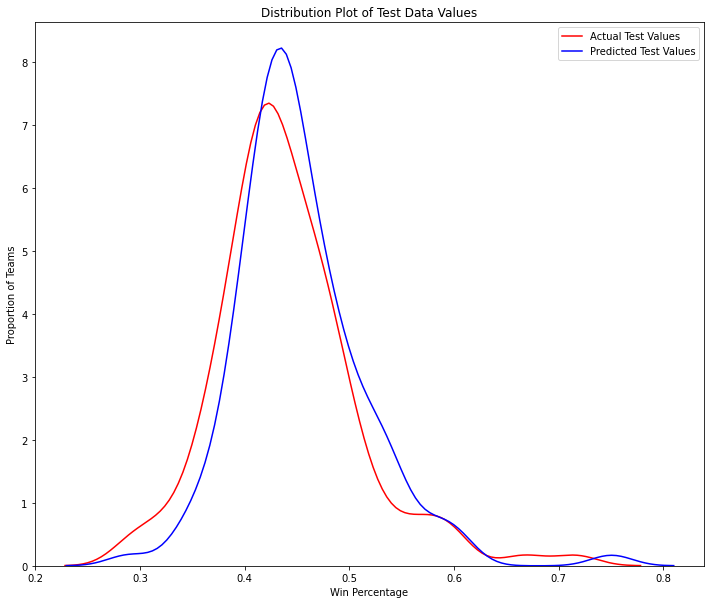

In [48]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [49]:
# Let's check the training group with statsmodel
X = x_train[MLR4]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     55.18
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.06e-70
Time:                        21:47:33   Log-Likelihood:                 642.09
No. Observations:                 330   AIC:                            -1258.
Df Residuals:                     317   BIC:                            -1209.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0352      1.432      1.421      0.1

In [50]:
# Let's check the test group with statsmodel
X = x_test[MLR4]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     16.32
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.80e-19
Time:                        21:47:33   Log-Likelihood:                 216.03
No. Observations:                 120   AIC:                            -406.1
Df Residuals:                     107   BIC:                            -369.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3065      1.968     -0.664      0.5

In [51]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5404249645663904


From this model, we wind up (again) with an R-squared value in the training group of 0.676, meaning 67.6% of the variance in the training data can be explained by the model. The test group's R-squared score fell slightly to 0.647. Our overall R-sqared score for this model fell to 0.540. Graphically, the distribution plot for the predicted test data values looks extremely similar to Model Attempt 1. 

From the training group data, we see that the P-value of 'Plays' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 5

In [52]:
# Create object for list of features
MLR5 = ['HR', 'BABIP_x', 'AVG', 'OBP', 'wOBA', 'BIZ',
       'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR5], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR5])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR5])

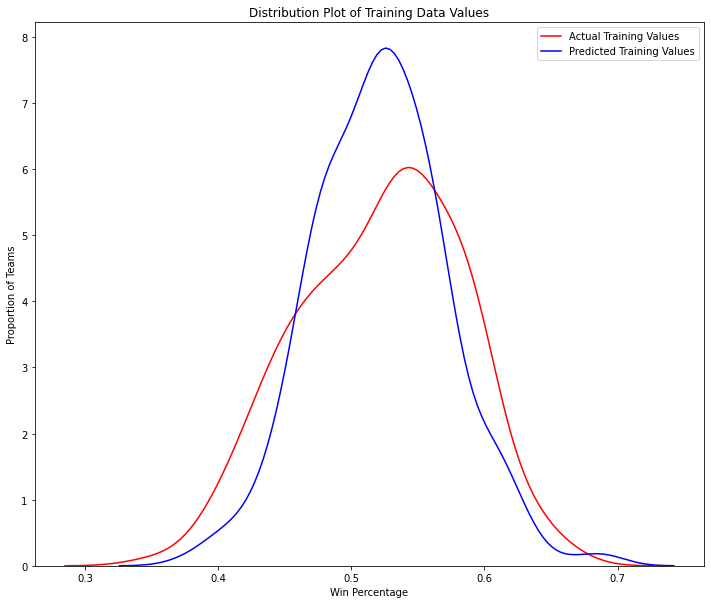

In [53]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

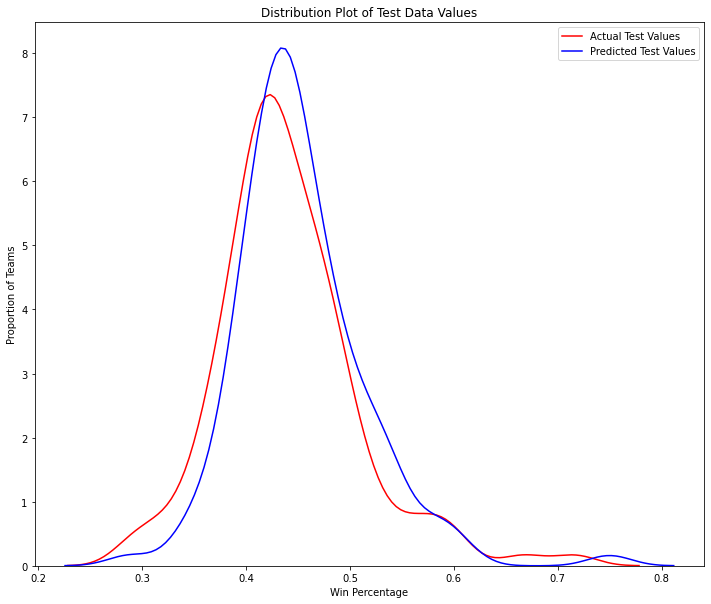

In [54]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [55]:
# Let's check the training group with statsmodel
X = x_train[MLR5]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     60.26
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           4.80e-71
Time:                        21:47:34   Log-Likelihood:                 641.85
No. Observations:                 330   AIC:                            -1260.
Df Residuals:                     318   BIC:                            -1214.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0847      0.208      5.222      0.0

In [56]:
# Let's check the test group with statsmodel
X = x_test[MLR5]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.23e-19
Time:                        21:47:34   Log-Likelihood:                 215.63
No. Observations:                 120   AIC:                            -407.3
Df Residuals:                     108   BIC:                            -373.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3354      0.406      0.827      0.4

In [57]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5467399510354496


From this model, we wind up with an R-squared value in the training group of 0.676, meaning 67.6% of the variance in the training data can be explained by the model. The test group's R-squared score fell slightly to 0.644. Our overall R-sqared score for this model increased to 0.545. Graphically, the distribution plot for the predicted test data values looks similar to previous models. 

From the training group data, we see that the P-value of 'RZR' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 6

In [58]:
# Create object for list of features
MLR6 = ['HR', 'BABIP_x', 'AVG', 'OBP', 'wOBA', 'BIZ',
       'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR6], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR6])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR6])

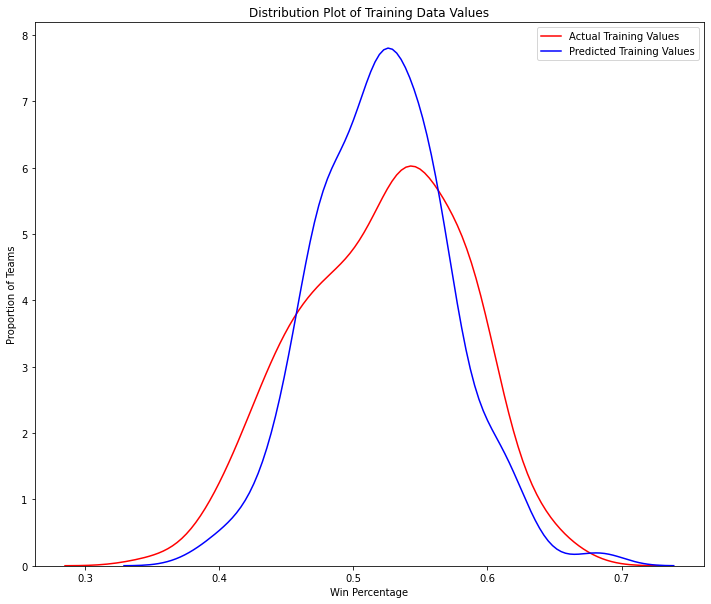

In [59]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

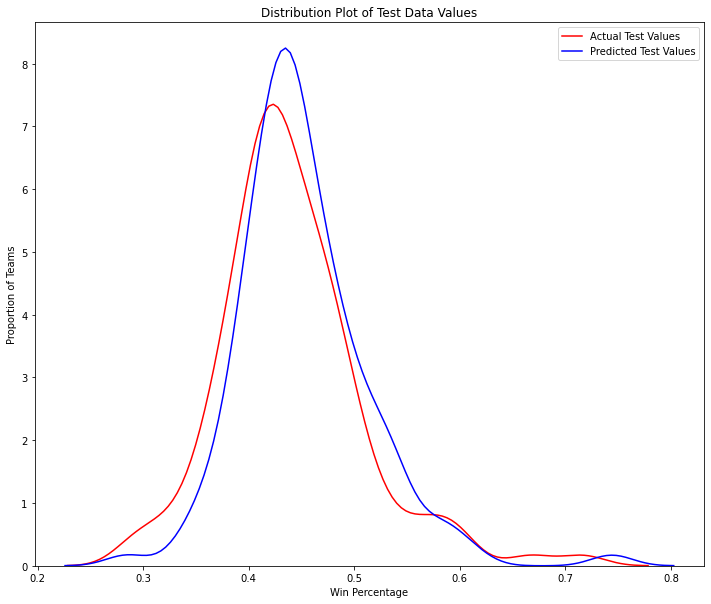

In [60]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [61]:
# Let's check the training group with statsmodel
X = x_train[MLR6]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     66.11
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.06e-71
Time:                        21:47:35   Log-Likelihood:                 641.21
No. Observations:                 330   AIC:                            -1260.
Df Residuals:                     319   BIC:                            -1219.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8789      0.095      9.273      0.0

In [62]:
# Let's check the test group with statsmodel
X = x_test[MLR6]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     19.72
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.79e-20
Time:                        21:47:36   Log-Likelihood:                 215.58
No. Observations:                 120   AIC:                            -409.2
Df Residuals:                     109   BIC:                            -378.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4392      0.182      2.409      0.0

In [63]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5532586123959853


From this model, we wind up with an R-squared value in the training group of 0.675, meaning 67.5% of the variance in the training data can be explained by the model. The test group's R-squared score remained the same at 0.644. Our overall R-sqared score for this model increased to 0.553. Graphically, the distribution plot for the predicted test data values looks similar to previous models. 

From the training group data, we see that the P-value of 'BIZ' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 7

In [64]:
# Create object for list of features
MLR7 = ['HR', 'BABIP_x', 'AVG', 'OBP', 'wOBA',
       'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR7], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR7])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR7])

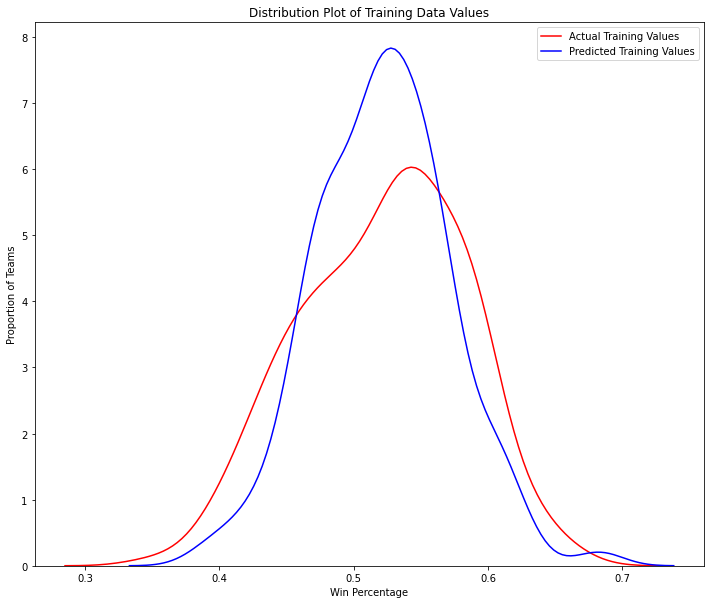

In [65]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

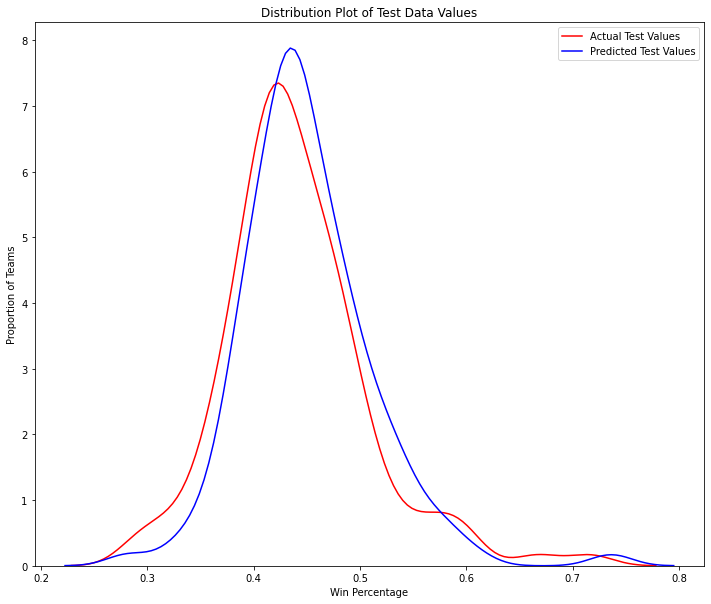

In [66]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [67]:
# Let's check the training group with statsmodel
X = x_train[MLR7]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     72.67
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.27e-72
Time:                        21:47:37   Log-Likelihood:                 639.67
No. Observations:                 330   AIC:                            -1259.
Df Residuals:                     320   BIC:                            -1221.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9231      0.092     10.079      0.0

In [68]:
# Let's check the test group with statsmodel
X = x_test[MLR7]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     22.01
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           6.75e-21
Time:                        21:47:37   Log-Likelihood:                 215.39
No. Observations:                 120   AIC:                            -410.8
Df Residuals:                     110   BIC:                            -382.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4739      0.172      2.761      0.0

In [69]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5524801946368444


From this model, we wind up with an R-squared value in the training group of 0.671, meaning 67.1% of the variance in the training data can be explained by the model. The test group's R-squared score fell to 0.643. Our overall R-sqared score for this model slightly decreased to 0.552. Graphically, the distribution plot for the predicted test data values looks similar to previous models. 

We seem to have a good model. None of our features has a p-value above 0.05, but in an effort to reduce cost, we will remove 'wOBA', which has the highest p-value.

#### Model Attempt 8

In [70]:
# Create object for list of features
MLR8 = ['HR', 'BABIP_x', 'AVG', 'OBP', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR8], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR8])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR8])

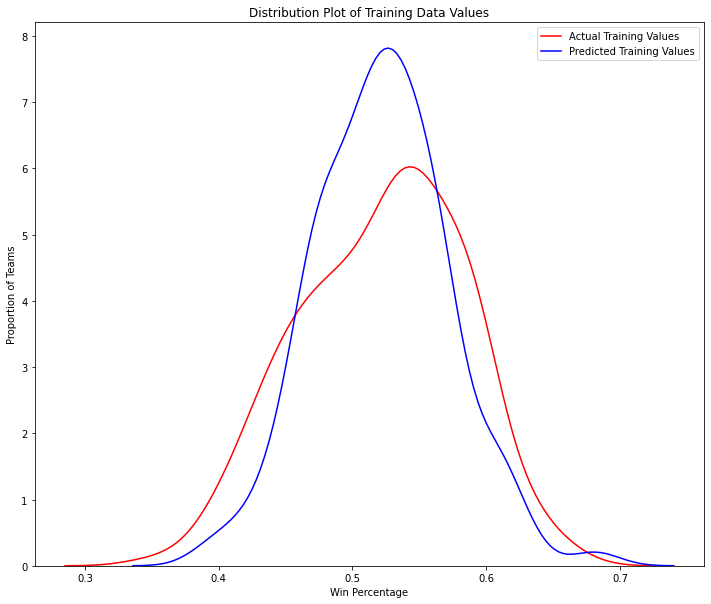

In [71]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

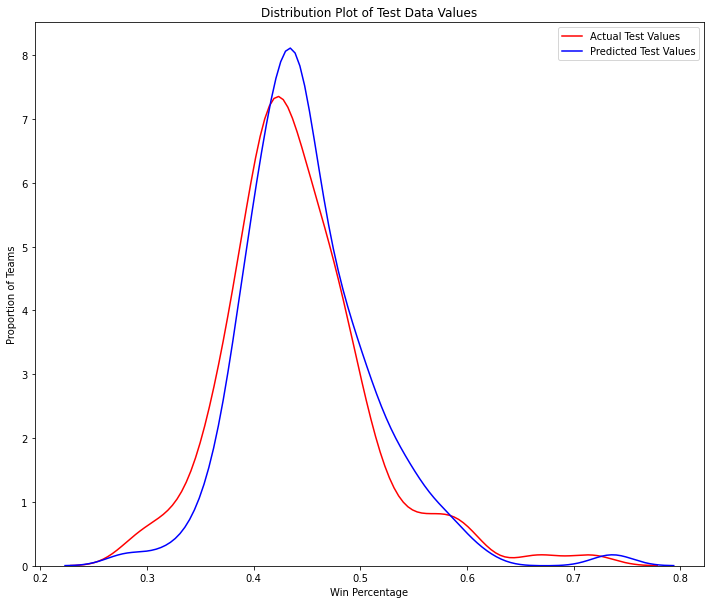

In [72]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [73]:
# Let's check the training group with statsmodel
X8 = x_train[MLR8]
Y8 = y_train
X8 = sm.add_constant(X8)
model8 = sm.OLS(Y8, X8).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     22.01
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           6.75e-21
Time:                        21:47:38   Log-Likelihood:                 215.39
No. Observations:                 120   AIC:                            -410.8
Df Residuals:                     110   BIC:                            -382.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4739      0.172      2.761      0.0

In [74]:
# Let's check the test group with statsmodel
X = x_test[MLR8]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     24.97
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.32e-21
Time:                        21:47:38   Log-Likelihood:                 215.38
No. Observations:                 120   AIC:                            -412.8
Df Residuals:                     111   BIC:                            -387.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4747      0.171      2.778      0.0

In [75]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5606710267949024


From this model, we wind up with an R-squared value in the training group of 0.643, meaning 64.3% of the variance in the training data can be explained by the model. The test group's R-squared score is identical at 0.643. Our overall R-sqared score for this model slightly increased to 0.561. Graphically, the distribution plot for the predicted test data values looks similar to previous models. 

From the training group data, we see that the P-value of 'BABIP_x' is highest at a level greater than 0.05, meaning it likely isn't significant. So in our model refinement, we should remove it.

#### Model Attempt 9

In [76]:
# Create object for list of features
MLR9 = ['HR', 'AVG', 'OBP', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR9], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR9])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR9])

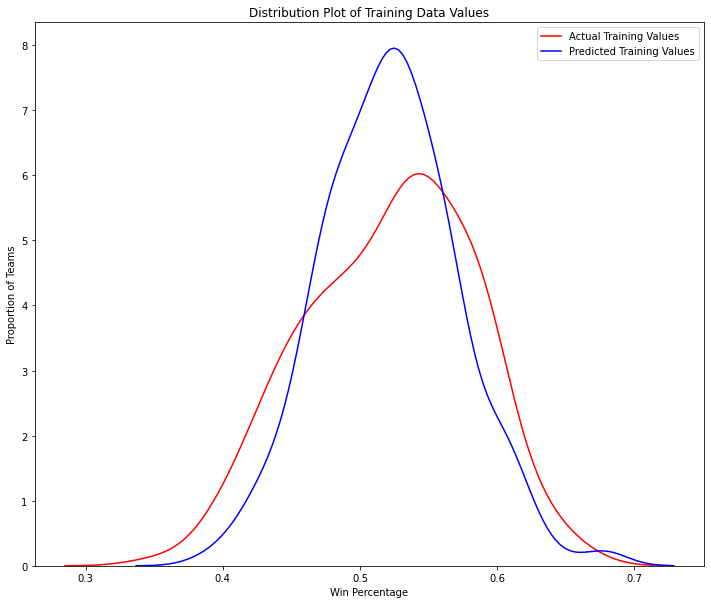

In [77]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

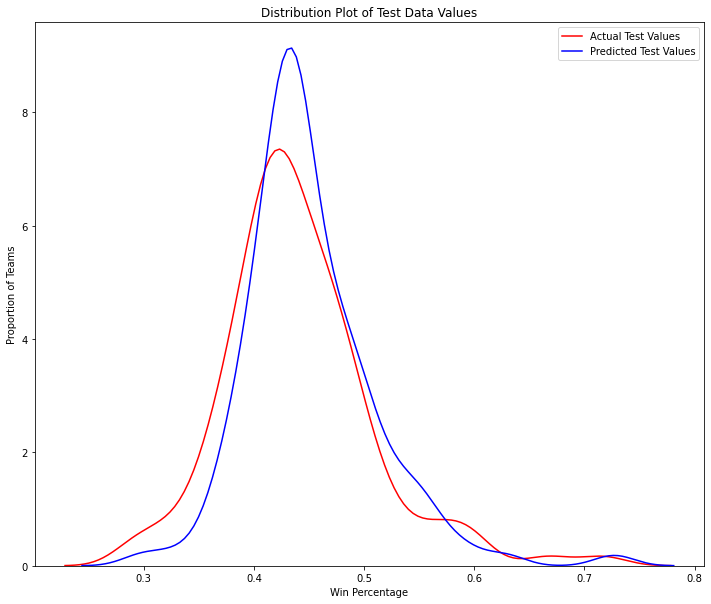

In [78]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [79]:
# Let's check the training group with statsmodel
X = x_train[MLR9]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     87.65
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           9.42e-71
Time:                        21:47:39   Log-Likelihood:                 631.99
No. Observations:                 330   AIC:                            -1248.
Df Residuals:                     322   BIC:                            -1218.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8092      0.089      9.140      0.0

In [80]:
# Let's check the test group with statsmodel
X = x_test[MLR9]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     28.72
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.58e-22
Time:                        21:47:39   Log-Likelihood:                 215.28
No. Observations:                 120   AIC:                            -414.6
Df Residuals:                     112   BIC:                            -392.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4992      0.161      3.109      0.0

In [81]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5813724554092377


From this model, we wind up with an R-squared value in the training group of 0.656, meaning 65.6% of the variance in the training data can be explained by the model. The test group's R-squared score fell slightly to 0.642. Our overall R-sqared score for this model increased to 0.581. Graphically, the distribution plot for the predicted test data values looks similar to previous models. 

We seem to have a good model. None of our features has a p-value above 0.05, but in an effort to reduce cost, we will remove 'AVG', which has the highest p-value.

#### Model Attempt 10

In [82]:
# Create object for list of features
MLR10 = ['HR', 'OBP', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR10], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR10])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR10])

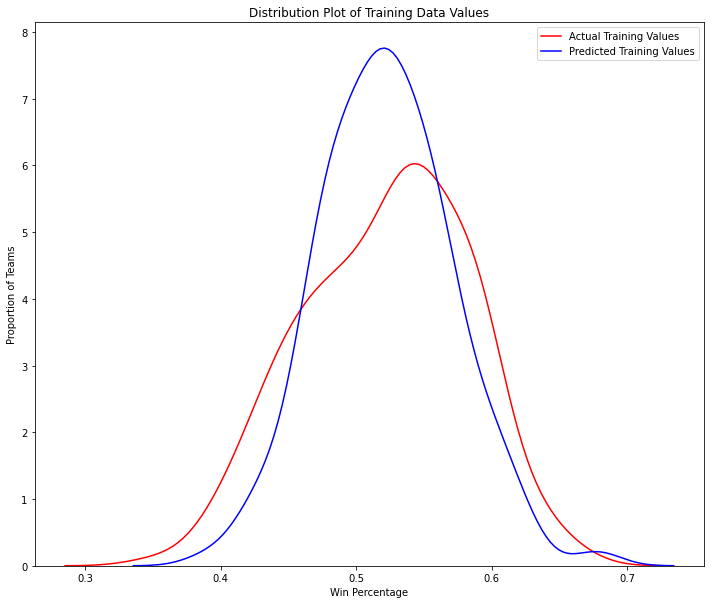

In [83]:
# Title and Graph of Training Group
Title = 'Distribution Plot of Training Data Values'
DistributionPlot(y_train, Yhat_train, 'Actual Training Values', 'Predicted Training Values', Title)

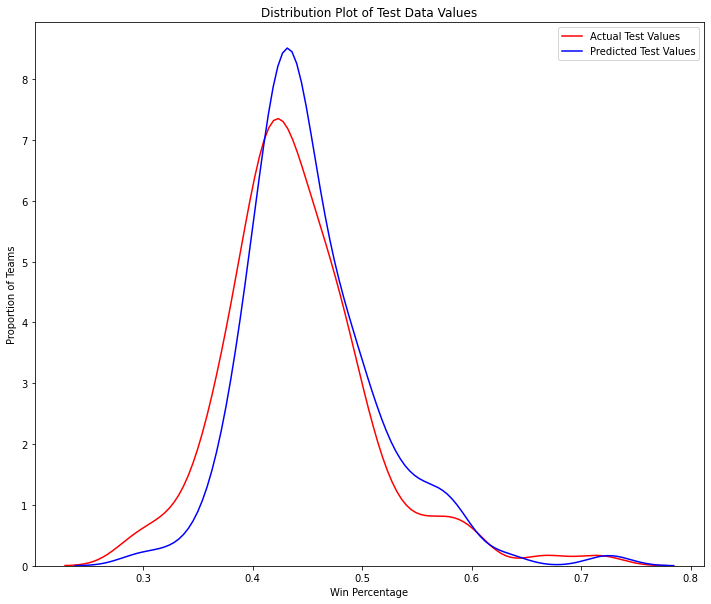

In [84]:
# Title and graph of test group
Title = 'Distribution Plot of Test Data Values'
DistributionPlot(y_test, Yhat_test, 'Actual Test Values', 'Predicted Test Values', Title)

In [85]:
# Let's check the training group with statsmodel
X = x_train[MLR10]
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     97.79
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.31e-69
Time:                        21:47:41   Log-Likelihood:                 626.86
No. Observations:                 330   AIC:                            -1240.
Df Residuals:                     323   BIC:                            -1213.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7799      0.089      8.734      0.0

In [86]:
# Let's check the test group with statsmodel
X = x_test[MLR10]
Y = y_test
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     33.70
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           4.78e-23
Time:                        21:47:41   Log-Likelihood:                 215.14
No. Observations:                 120   AIC:                            -416.3
Df Residuals:                     113   BIC:                            -396.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5227      0.153      3.420      0.0

In [87]:
# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)

The R-squared is: 0.5739280793994651


From this model, we wind up with an R-squared value in the training group of 0.645, meaning 70.6% of the variance in the training data can be explained by the model. The test group's R-squared score is relatively close at 0.641. The model's overall R-squared score slightly decreased to 0.574. Graphically, in our distribution plots, not much has changed between the different models. The models' test group predict close to a bell curve distribution in win percentage, with a peak slightly before the 0.5 mark and a much smaller peak near 0.72.

We seem to have a strong model here, as the highest p-value among the remaining features is 0.001 and the Prob(F-statistic) is also extremely low. However, this was also the case with Model 9, which had a slightly higher overall R-squared value. Because of this, we will use Model 9.

Therefore, we will use this equation to determine the win percentage of a team:

<i><b>W%</b> = 0.8092 + (0.1078 * HR) + (1.0229 * AVG) + (1.4072 * OBP) - (0.4279 * HR/9) - (2.0556 * BABIP_y) - (0.8026 * GB%) + (2.4894 * HR/FB)</i>

## VIII. Model Evaluation

#### Model 9 Evaluation

Now that we have developed and chosen a model, we should evaluate it. We will look at the R-squared of the model to determine to what degree the model explains the variance in the data. We will also look at the regression plot, residual plot, and a histogram of the errors of the model to see how accurate it was at predicting the win percentage in the test set.

In [88]:
# Use Model 9
MLR9 = ['HR', 'AVG', 'OBP', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']

# Fit the model to our training group
lr.fit(x_train[MLR9], y_train)

# Find Yhat of training group
Yhat_train = lr.predict(x_train[MLR9])

# Find Yhat of test group
Yhat_test = lr.predict(x_test[MLR9])

# Report R^2 of the model
r_squared = r2_score(Y, Yhat_test)
print('The R-squared is:', r_squared)
MSE = mean_squared_error(Y, Yhat_test)
print('The mean squared error of actual W% and predicted W% is:', MSE)

The R-squared is: 0.5813724554092377
The mean squared error of actual W% and predicted W% is: 0.0018948020906331916


We see that 58.1% of the variance of the data is explained by our model. Moreover, our MSE is low at 0.002. Both of these metrics indicate a model that shows effectiveness without overfitting. Let's look more closely at how the model did with the test set.

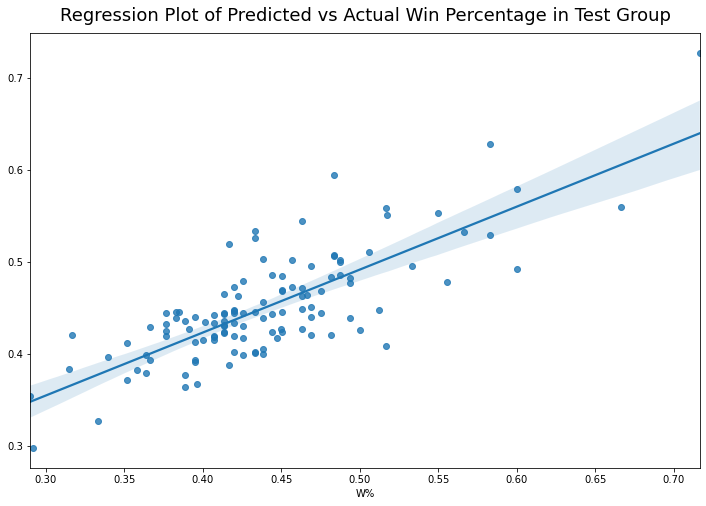

In [89]:
# Regression plot
plt.figure(figsize=(12,8))
regplot1 = sns.regplot(x = y_test, y = Yhat_test, data = df)
regplot1.set_title('Regression Plot of Predicted vs Actual Win Percentage in Test Group', fontdict={'fontsize':18}, pad=12)
plt.savefig('FinalRegPlot.png', bbox_inches = 'tight')

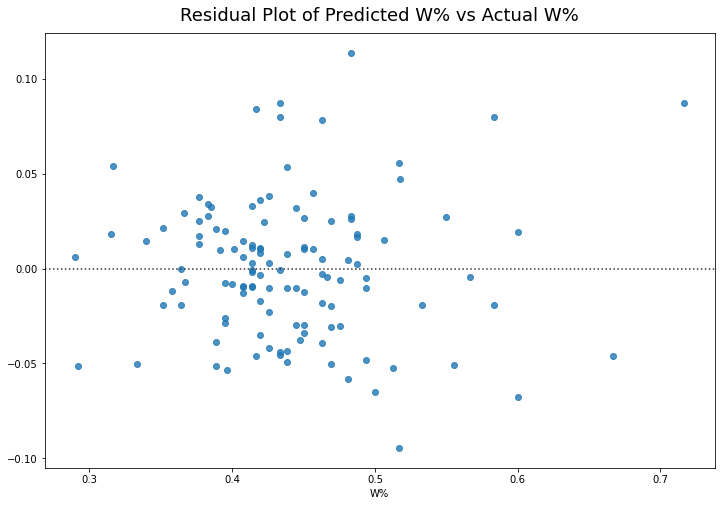

In [90]:
# Residual Plot
plt.figure(figsize=(12, 8))
resplot2 = sns.residplot(Y, Yhat_test, data = df)
resplot2.set_title('Residual Plot of Predicted W% vs Actual W%', fontdict={'fontsize':18}, pad=12)
plt.savefig('FinalResPlot.png', bbox_inches = 'tight')

In both of these graphs, the line is our predicted win percentage in the test set, while the points are the actual win percentage of the test set. The distance of each residual appears to be pretty random, which is a great sign. This means the model's prediction errors would seem to be pretty normally distributed. We can investigate this further with a histogram showing the frequency of the size of error between predicted and actual values.

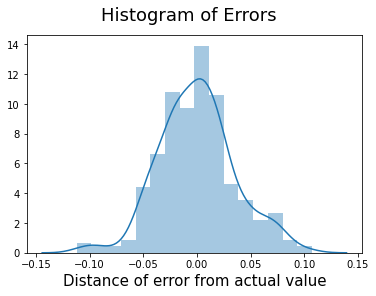

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - Yhat_train), bins = 16)
fig.suptitle('Histogram of Errors', fontsize = 18)                  
# Plot heading 
plt.xlabel('Distance of error from actual value', fontsize = 15)
plt.savefig('HistofErr.png', bbox_inches = 'tight')

The graph is close to being normally distributed, which is great. This means that the model's prediction errors were most often very small and were balanced between being too high and too low. So the model does not need to be further adjusted.

## IX. Model Application

Now that we have developed our model and have an equation, we should determine who has been the most valuable player in terms of contributing to wins. The features used in our equation include aspects of batting and aspects of pitching (the features for fielding were removed during model refinement). This makes sense. A team that wins will have its batters scoring more runs and its pitchers denying the other team's batters from doing so. 

However, determining who has been the most valuable player is actually somewhat challenging because of how baseball is played: pitchers generally do not bat (or do not bat often), and batters are very rarely pitchers. Moreover, pitchers do not play most games, limiting their impact over the course of a season. 

As such, we will focus our most valuable player to who is the best at batting. We will use the batting features of our win percentage equation to create a new feature which scores the batters.

In [92]:
# Pull batting dataset
Batters = pd.read_csv(r'~/Github/DATA601_FinalProject/Data/PlayerStats_Batting.csv')
Batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2185 non-null   object 
 1   Team      2185 non-null   object 
 2   G         2185 non-null   int64  
 3   PA        2185 non-null   int64  
 4   HR        2185 non-null   int64  
 5   R         2185 non-null   int64  
 6   RBI       2185 non-null   int64  
 7   SB        2185 non-null   int64  
 8   BB%       2185 non-null   object 
 9   K%        2185 non-null   object 
 10  ISO       2185 non-null   float64
 11  BABIP     2185 non-null   float64
 12  AVG       2185 non-null   float64
 13  OBP       2185 non-null   float64
 14  SLG       2185 non-null   float64
 15  wOBA      2185 non-null   float64
 16  wRC+      1553 non-null   float64
 17  EV        1414 non-null   float64
 18  BsR       2185 non-null   float64
 19  Off       2185 non-null   float64
 20  Def       2185 non-null   floa

Let's create our most valuable batter calculation.

In [93]:
# Create MVB
Batters['MVB'] = ((0.1078 * Batters['HR']) + (1.0229 * Batters['AVG']) + (1.4072 * Batters['OBP']))
# Sort players
Batters.sort_values(by=['MVB'], inplace = True, ascending = False)
Batters.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,SLG,wOBA,wRC+,EV,BsR,Off,Def,WAR,playerid,MVB
0,Mike Trout,Angels,441,1956,134,344,301,58,18.50%,19.90%,...,0.630,0.436,181.0,90.8,17.5,213.3,-2.0,27.8,10155,15.371238
30,Nelson Cruz,- - -,472,1971,133,275,357,2,10.50%,22.90%,...,0.565,0.389,149.0,93.4,-13.9,105.3,-48.6,12.5,2434,15.153428
37,J.D. Martinez,- - -,469,2032,131,316,366,13,10.60%,23.20%,...,0.592,0.399,148.0,91.6,-15.5,105.8,-54.9,11.9,6184,14.961230
8,Nolan Arenado,Rockies,518,2216,124,329,384,8,9.60%,15.40%,...,0.564,0.385,125.0,89.2,2.4,73.1,38.7,18.3,9777,14.195373
26,Eugenio Suarez,Reds,515,2131,124,282,327,10,11.60%,25.60%,...,0.515,0.367,125.0,88.9,-11.1,57.4,5.5,13.4,12552,14.141023


We see that our most valuable batter from 2017 through 2020 is Mike Trout of the Los Angeles Angels.

## X. Conclusions, Interpretation, and Limitations

In conclusion, we have developed a model that will account for 58.1% of data variance with a low mean squared error of 0.002 while maintaining that all of its included features are statistically significant. Moreover, it uses seven features, so its cost to calculate is low.

We should now return to our research questions to answer them:
* What features most significantly impact the winning percentage of a given Major League Baseball (MLB) team?
    * The features which most significantly impact winning percentage are home runs (HR), batting average (AVG), on-base percentage (OBP), home runs allowed per nine innings (HR/9), batting average allowed on balls in play (BABIP_y), ground ball percentage (GB%), and home runs allowed per fly ball (HR/FB).
* For those given features, to what extent do they impact a team's winning percentage?
    * From multiple linear regression models, the following formula was created:
    <div align="center"><i><b>W%</b> = 0.8092 + (0.1078 * HR) + (1.0229 * AVG) + (1.4072 * OBP) - (0.4279 * HR/9) - (2.0556 * BABIP_y) - (0.8026 * GB%) + (2.4894 * HR/FB)</i></div>
* Based on this, who has been the most valuable player in contributing to a team's winning percentage from 2017-2020?
    * It was calculated that Mike Trout contributed the most offensively toward his team's winning percentage.

Based on this information, a general manager can attempt to build a winning roster by signing or trading for players that will improve the team's statistics that impact winning percentage. It also means that conversely, the general manager can determine if particular players are harming the team's odds of winning. The general manager could also use this to find players at specific contract costs that will maximize the team's potential winning percentage at a given salary payroll. 

### Limitations
One limitation comes from baseball itself. We could only craft a model that accounted for 58.1% of data variance. There is a lot to baseball that impacts winning and losing. While you want your team to bat well, field well, and pitch well, no team is perfect. Players make mistakes in all phases of the game which can have a direct outcome on the result, especially in a close game. So this model cannot account for a higher amount of the data variance.

Additionally, one of the problems with sports predictions is that the rows are not truly independent of one another. The teams play each other, impactingFor example, if the Yankees defeat the Orioles, that 

Another limitation is that the dataset of team statistics was only 450 rows. This was chosen as a precaution to prevent skewed data from the "steroid era" of baseball. But a larger dataset from multiple decades of seasons would be preferable. Additionally, a few features were removed due to many null values. Perhaps these features could have been important in determining the win percentage, but the decision was made to preserve as many rows/seasons as possible in the dataset.

### Final Thoughts
These notebooks sought to develop a model to predict a Major League Baseball team's winning percentage based on the team's performance in particular areas (features). The model did this fairly well, but I was disappointed in it only covering 58.1% of the data variance. That being said, it seems on par or even outperforms similar models found through a search of Google. There is a model (coded in R) ([link here](https://rstudio-pubs-static.s3.amazonaws.com/466923_475fdd164e7343f88fa8b2df67d3b648.html#model-diagnostics)) that ended with a 0.426 R-squared value, and another multiple linear regression model ([link here](http://rstudio-pubs-static.s3.amazonaws.com/326635_edfcfb859221409eb4fcc8e8d564bb09.html)) that ended with a 0.93 R-squared value. What I noticed about the models with much higher R-squared values is that they approached the problem very differently. They saw that run differential has a high correlation with win percentage, and then used regression to target run differential. This approach was popularized by <i>Moneyball</i>, so most of the work I have found uses this approach. Another key difference is that I opted to include advanced baseball stats (known commonly as sabermetrics) in my dataset, which is uncommon. Surprisingly, the batting sabermetrics did not make it into the model, but the pitching sabermetrics did.

All that being said, I would be interested in attempting this again through the <i>Moneyball</i> approach to see how my results would differ.